# Email Spam Classification

## task_1:
Dataset collection: Data collected and stored in csv file.

## Importing important libraries

In [1]:
import numpy as np # to perform numrical operations on data
import pandas as pd # to read and perform operations on dataod
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns

In [2]:
#reading data from file
df=pd.read_csv("mail_data.csv")

In [3]:
#printing sample data of first 10 rows
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
#printing data shape to know more about data set
df.shape # our data contains 5572 rows and 2 columns

(5572, 2)

# 2. Data Preproceesing 

1. Data preprocessing involves performing operations on data make it clean and error free. 
2. remove duplicate values
3. remove null values
4. remove unwanted data
5. convert to lower case 
6. remove special character like / .,;


In [5]:
#getting more information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#checking null values
df.isnull().sum()
#our does not contain any null values 

Category    0
Message     0
dtype: int64

In [7]:
#check for duplicate values 
df.duplicated().sum()

np.int64(415)

In [8]:
#dropping duplicate values
#using inplace=True to change values in original data set 
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum() #checking again for duplicate values and we have 0

np.int64(0)

In [10]:
df["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
print("Data type before conversion:", df['Category'].dtype)

Data type before conversion: object


In [12]:
#now converting values from category column to 0,1
#there several methods like replace , map and using sickit_learn library encoder
# df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [13]:
#or we can use sickit_learn library instead 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])

In [14]:
df['Category'].unique()

array([0, 1])

In [15]:
#changing datatype of column as int
df["Category"]=df["Category"].astype(int)

In [16]:
df.shape

(5157, 2)

## Lowercase
some time our operation on data can be case sensitive so converting text data to lower case to eliminate this condition
## tokenization
assigning token to words, sentences
## punctuation marks
removing punctuation marks using string library 
## stop words
stop words are used to make sentences like is,am,are,therefore etc
## stemming
converting other forms to first form of the verb

In [17]:
#importing important libraries
import re #regular expression 
import nltk #natural language tokenization 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation

In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [48]:
#creating a function to process the data and store processed data in other column as processd data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
     # Join tokens back to a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
# df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x))
# Apply the preprocessing function and save the results in a new column
# df['processed_text'] = df['Message'].apply(preprocess_text)


In [49]:
df['processed_text'] = df['Message'].apply(preprocess_text)

In [50]:
df['processed_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
#using join to join tokens to create simple words
# df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x))

In [52]:
df.head()

,Category,Message,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## Extracting most common words from both ham and spam messages

In [24]:
#showing most common words in spam messages
#creating empty list
spam_msg=[]
#converting current data to single list
for msg in df[df['Category'] == 1]['processed_text'].tolist():
    for word in msg.split():
        spam_msg.append(word)

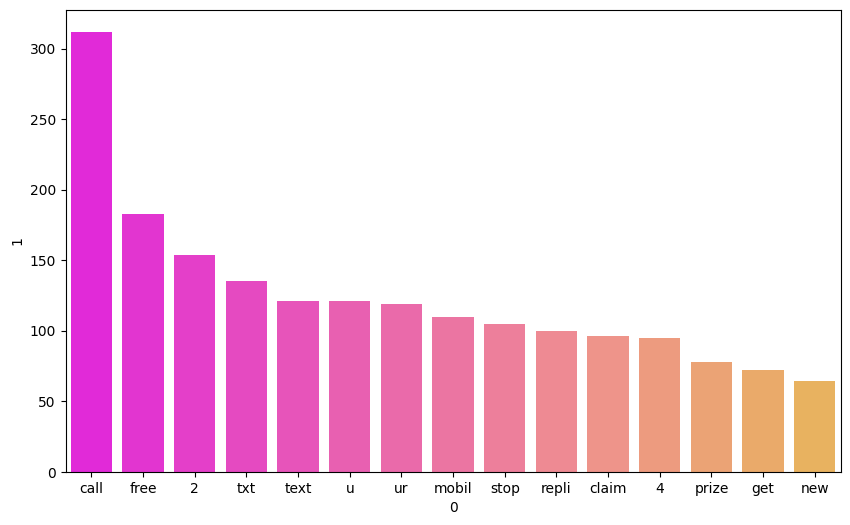

In [25]:
#importing library for most common words
from collections import Counter
plt.figure(figsize=(10,6))

sns.barplot(x=pd.DataFrame(Counter(spam_msg).most_common(15))[0],y=pd.DataFrame(Counter(spam_msg).most_common(15))[1],hue=pd.DataFrame(Counter(spam_msg).most_common(20))[0],palette="spring",legend=False)
plt.show()


In [26]:
#showing most common words in ham messages
#creating empty list
ham_msg=[]
#converting current data to single list
for msg in df[df['Category'] == 0]['processed_text'].tolist():
    for word in msg.split():
        ham_msg.append(word)

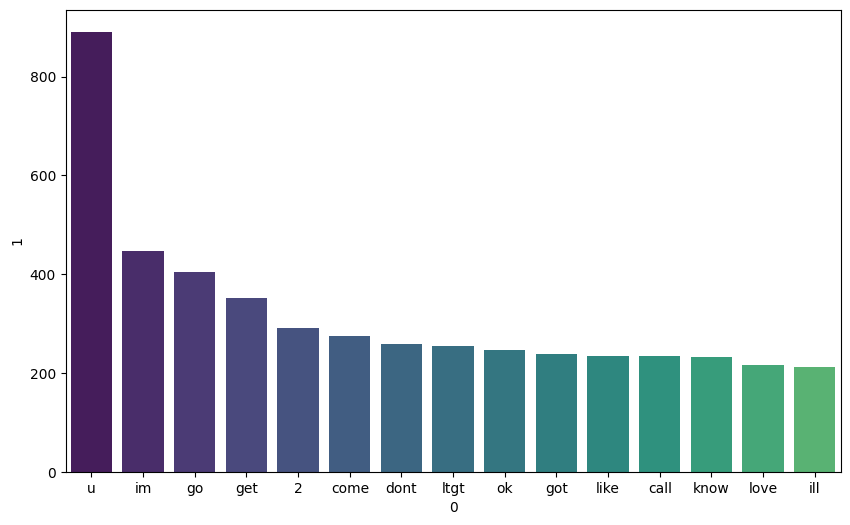

In [27]:
plt.figure(figsize=(10,6))

sns.barplot(x=pd.DataFrame(Counter(ham_msg).most_common(15))[0],y=pd.DataFrame(Counter(ham_msg).most_common(15))[1],hue=pd.DataFrame(Counter(ham_msg).most_common(20))[0],palette="viridis",legend=False)
plt.show()


## Model Building 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
from sklearn.pipeline import make_pipeline


In [29]:
#Vectorize the text data using binary CountVectorizer

vectorizer = TfidfVectorizer(binary=True,max_features=3000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['Category']

In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Initialize models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [32]:
# Initialize a list to store results
results_list = []
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
     # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  # Assume 'spam' is the positive class

    # Append the results to the list
    results_list.append({'Model': name, 'Metric': 'Accuracy', 'Score': accuracy})
    results_list.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    
    # Print performance metrics
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

Model: Multinomial Naive Bayes
Accuracy: 0.9767441860465116
precision: 1.0
Confusion Matrix:
 [[1345    0]
 [  36  167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1345
           1       1.00      0.82      0.90       203

    accuracy                           0.98      1548
   macro avg       0.99      0.91      0.94      1548
weighted avg       0.98      0.98      0.98      1548

--------------------------------------------------
Model: Bernoulli Naive Bayes
Accuracy: 0.9799741602067183
precision: 0.9725274725274725
Confusion Matrix:
 [[1340    5]
 [  26  177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1345
           1       0.97      0.87      0.92       203

    accuracy                           0.98      1548
   macro avg       0.98      0.93      0.95      1548
weighted avg       0.98      0.98      0.98    

In [33]:
# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

In [34]:
# results_df1

In [35]:
# Sort the results DataFrame by Model and Metric
sorted_results_df = results_df.sort_values(by=['Model', 'Metric'], ascending=False)
sorted_results_df

,Model,Metric,Score
13,k-NN,Precision,1.000000
12,k-NN,Accuracy,0.913437
7,SVM,Precision,0.970930
6,SVM,Accuracy,0.973514
9,Random Forest,Precision,0.960674
8,Random Forest,Accuracy,0.974806
1,Multinomial Naive Bayes,Precision,1.000000
0,Multinomial Naive Bayes,Accuracy,0.976744
11,Logistic Regression,Precision,0.959184
10,Logistic Regression,Accuracy,0.956072


<Figure size 800x600 with 0 Axes>

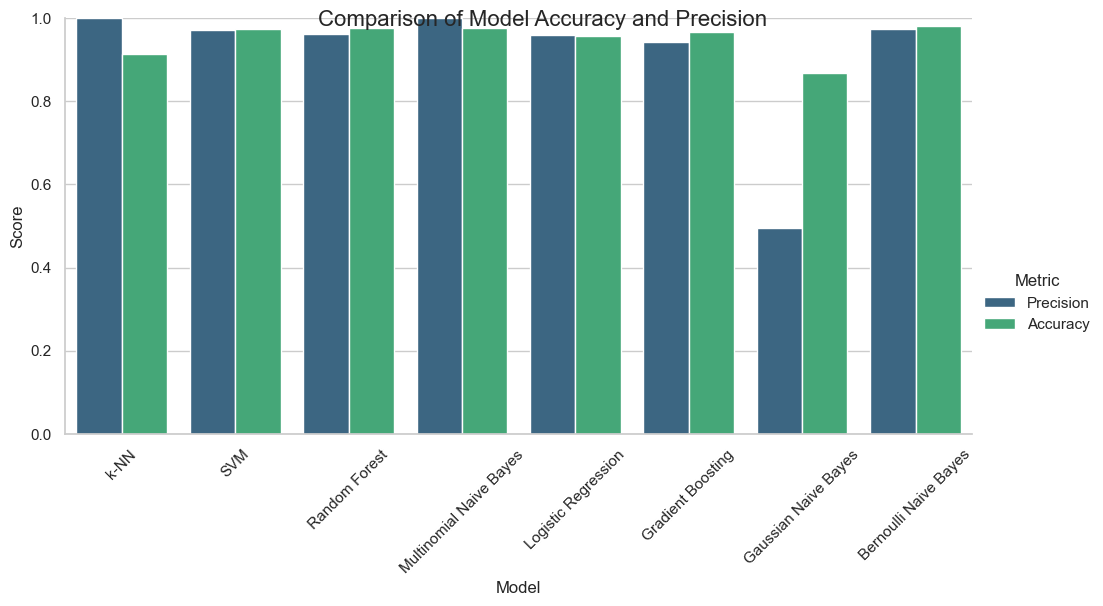

In [36]:
# Plot the results using a catplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
catplot = sns.catplot(
    data=sorted_results_df, 
    x='Model', 
    y='Score', 
    hue='Metric', 
    kind='bar', 
    palette='viridis',
    height=5,
    aspect=2
)
catplot.set_axis_labels("Model", "Score")
catplot.fig.suptitle('Comparison of Model Accuracy and Precision', fontsize=16)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## prediction

In [89]:
# Define a list of new emails to test
new_emails = [
    "Congratulations! You've won a $1000 gift card. Click here to claim your prize.",
    "Hi team, can we schedule a meeting for tomorrow to discuss the project?",
    "Your account has been compromised. Please provide your login details to verify your identity.",
    "Let's catch up soon. I have some updates on our upcoming event."
]

# Preprocess new emails
preprocessed_emails = [preprocess_text(email) for email in new_emails]

# Vectorize the preprocessed new emails
X_new = vectorizer.transform(preprocessed_emails).toarray()

# Predict using the trained models
predictions = {name: model.predict(X_new) for name, model in models.items()}

# Predict using the trained Multinomial Naive Bayes model
multinomial_predictions = models["Multinomial Naive Bayes"].predict(X_new)

# Print results using if-else logic
print("Prediction Results for New Emails:")
for pred in multinomial_predictions:
    if pred == 1:
        print("spam")
    else:
        print("ham")


Prediction Results for New Emails:
spam
ham
ham
ham


In [89]:
# Define a list of new emails to test
new_emails = [
    "Congratulations! You've won a $1000 gift card. Click here to claim your prize.",
    "Hi team, can we schedule a meeting for tomorrow to discuss the project?",
    "Your account has been compromised. Please provide your login details to verify your identity.",
    "Let's catch up soon. I have some updates on our upcoming event."
]

# Preprocess new emails
preprocessed_emails = [preprocess_text(email) for email in new_emails]

# Vectorize the preprocessed new emails
X_new = vectorizer.transform(preprocessed_emails).toarray()

# Predict using the trained models
predictions = {name: model.predict(X_new) for name, model in models.items()}

# Predict using the trained Multinomial Naive Bayes model
multinomial_predictions = models["Multinomial Naive Bayes"].predict(X_new)

# Print results using if-else logic
print("Prediction Results for New Emails:")
for pred in multinomial_predictions:
    if pred == 1:
        print("spam")
    else:
        print("ham")


Prediction Results for New Emails:
spam
ham
ham
ham
